<a href="https://colab.research.google.com/github/frukkurt/TMLCC_wonderland/blob/main/Neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PREP

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder

path="/content/drive/MyDrive/TMLCC/"


In [ ]:
df_train = pd.read_csv(path+'train.csv')
df_test = pd.read_csv(path+'test.csv')
df_train.head()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001


In [ ]:
df_train.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,68613.000000,6.652600e+04,68613.000000
mean,3447.363207,1656.761858,1666.766690,0.259164,0.376052,4.203271,11.919257,20.583592,28.599681,inf,120.002797
std,4840.665782,1259.086320,1366.317223,0.164758,0.476452,3.144905,10.783136,10.100870,153.806887,NaN,89.573112
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.612299e+00,-44.285746
25%,1556.075767,893.662700,511.930000,0.142580,0.119000,2.000000,4.000000,14.000000,12.818366,5.267536e+00,65.537205
50%,2190.442847,1259.699253,1542.830000,0.242620,0.248400,3.000000,10.000000,20.000000,19.689890,5.899089e+00,98.552185
75%,3605.836441,1897.163660,2517.960000,0.345120,0.443800,4.000000,16.000000,25.000000,32.954388,6.768365e+00,163.139540
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,29369.777780,inf,736.061636


In [ ]:
#CLEAN

In [ ]:
df_train = df_train.dropna()
df_train = df_train.loc[(df_train['void_volume [cm^3/g]'] > 0) & (df_train['void_fraction'] > 0) & (df_train['surface_area [m^2/g]'] > 0) & (df_train['volume [A^3]'] > 0)]
df_train=df_train.reset_index(drop=True)
df_train.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000,53778.000000
mean,3835.391420,1667.981285,2110.486720,0.307554,0.457113,4.031370,11.938116,20.858530,21.466570,5.626909,110.734735
std,5284.475631,1295.548979,1188.036475,0.144723,0.500834,3.087429,10.596209,9.994758,15.362647,1.101826,82.866095
min,606.576038,439.281220,37.220000,0.025340,0.015600,1.000000,1.000000,1.000000,2.146118,1.612299,-22.610040
25%,1621.472215,893.798040,1235.567500,0.205742,0.194700,2.000000,4.000000,15.000000,12.277724,5.138883,63.371360
50%,2345.407535,1234.224448,1916.215000,0.283325,0.318300,3.000000,11.000000,21.000000,17.604910,5.662445,90.582124
75%,3921.727031,1919.632629,2789.580000,0.373188,0.509400,4.000000,16.000000,25.000000,26.269232,6.265164,144.255649
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,220.443694,10.612112,736.061636


In [ ]:
#PREPROCESS

In [ ]:
pre_=[]
post_=[]
for i in range (len(df_train)):
    x=df_train.functional_groups[i].split("-")
    if len(x)==1:
        pre_.append(x[0])
        post_.append("bank")
    else:
        pre_.append(x[0])
        post_.append(x[1])
df_train["Pre_function"]=pre_
df_train["Post_function"]=post_
df_train
        
    

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],Pre_function,Post_function
0,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774,F,OMe
1,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011,OMe,COOH
2,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004,H,SO3H
3,mof_unit_6,3954.659761,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,sra,17.146541,5.398304,55.786959,Pr,NO2
4,mof_unit_7,3565.914939,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,etb,18.363791,6.303857,111.690462,NH2,bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,mof_unit_66520,1426.479810,1272.451540,1343.62,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105,Me,I
53774,mof_unit_66521,23943.701366,5497.752320,4182.24,0.66340,1.7399,HCO-Me,1,9,27,pcu,4.060772,3.605688,2.675231,HCO,Me
53775,mof_unit_66522,14389.971556,4396.164320,4149.64,0.57051,1.1246,OPr-Cl,1,9,20,pcu,4.313411,3.361233,-1.686092,OPr,Cl
53776,mof_unit_66523,16997.806645,3932.703680,4326.62,0.66963,1.7430,CN,2,2,5,nbo,3.447440,2.781566,-7.546805,CN,bank


In [ ]:
dummies_meatl = pd.get_dummies(df_train['metal_linker'], prefix='met')
dummies_topology = pd.get_dummies(df_train['topology'], prefix='topo')
df_onehot = pd.concat([dummies_meatl,dummies_topology], axis = 1)
df_onehot

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53774,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53775,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53776,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
dummies_func_pre = pd.get_dummies(df_train['Pre_function'])
dummies_func_post = pd.get_dummies(df_train['Post_function'])
df_func=dummies_func_pre+dummies_func_post
df_func=df_func.drop(columns="bank")
df_func


,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
53774,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
53775,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
53776,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_onehot = pd.concat([df_onehot,df_func], axis = 1)
df_onehot

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
53774,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
53775,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
53776,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## NORMALIZED / Correlation /Density

In [ ]:
#DENSITY
df_train["Density"]=df_train["weight [u]"]/df_train["volume [A^3]"]
df_train

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g],Pre_function,Post_function,Density
0,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774,F,OMe,0.798590
1,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011,OMe,COOH,0.709924
2,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004,H,SO3H,0.591620
3,mof_unit_6,3954.659761,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,sra,17.146541,5.398304,55.786959,Pr,NO2,0.390180
4,mof_unit_7,3565.914939,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,etb,18.363791,6.303857,111.690462,NH2,bank,0.548176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,mof_unit_66520,1426.479810,1272.451540,1343.62,0.30190,0.2038,Me-I,3,12,21,pcu,5.867674,4.485481,7.602105,Me,I,0.892022
53774,mof_unit_66521,23943.701366,5497.752320,4182.24,0.66340,1.7399,HCO-Me,1,9,27,pcu,4.060772,3.605688,2.675231,HCO,Me,0.229612
53775,mof_unit_66522,14389.971556,4396.164320,4149.64,0.57051,1.1246,OPr-Cl,1,9,20,pcu,4.313411,3.361233,-1.686092,OPr,Cl,0.305502
53776,mof_unit_66523,16997.806645,3932.703680,4326.62,0.66963,1.7430,CN,2,2,5,nbo,3.447440,2.781566,-7.546805,CN,bank,0.231365


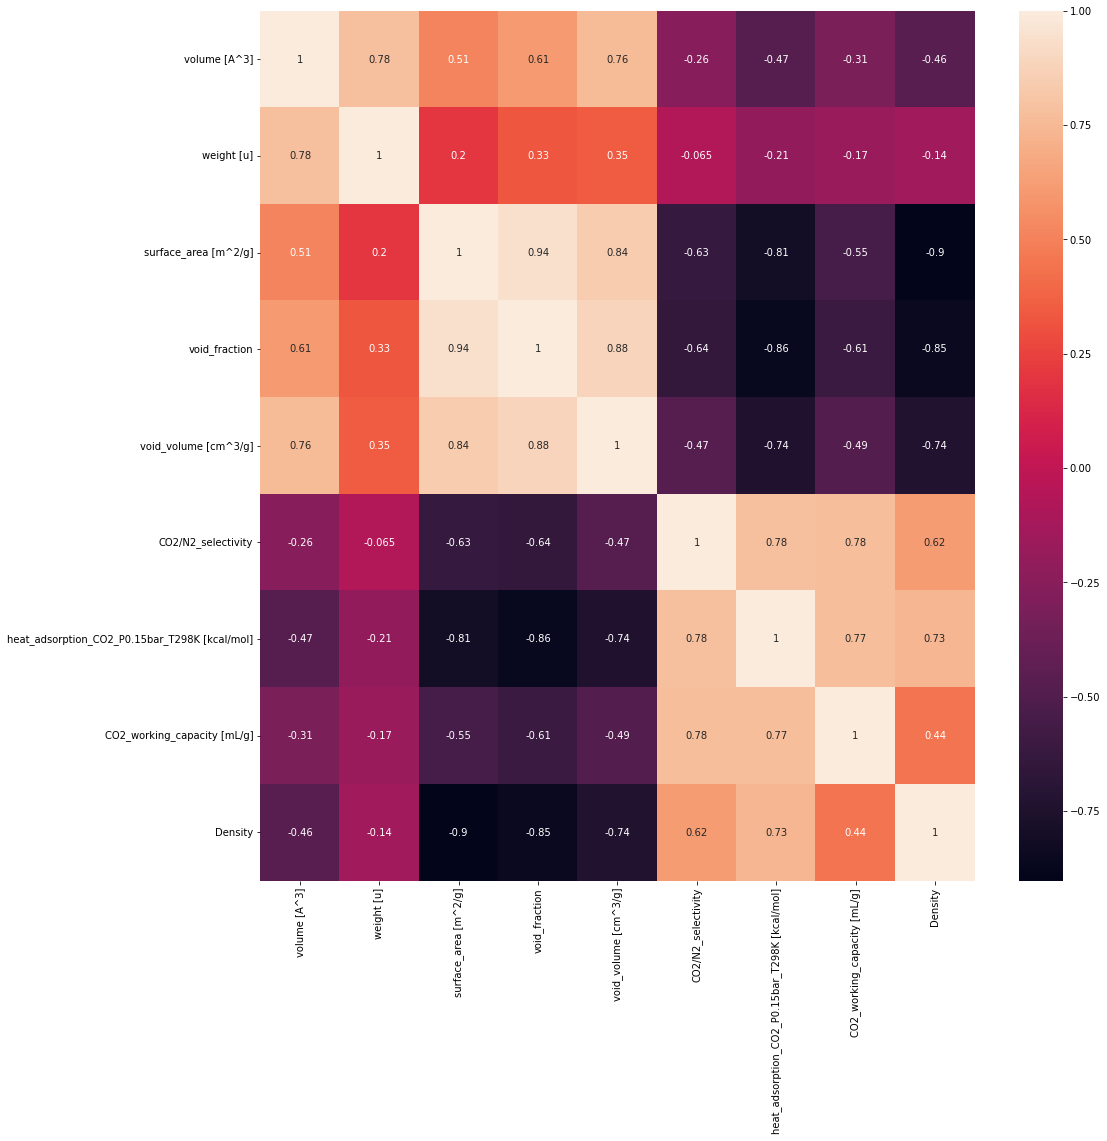

In [ ]:

df_train_corr=df_train.drop(["MOFname","functional_groups",'metal_linker', 'organic_linker1', 'organic_linker2', 'topology'], axis=1)
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
sns.heatmap(df_train_corr.corr(),annot=True);
plt.show()

In [ ]:
#NORMALIZE

df_train_norm = df_train.drop(["MOFname","functional_groups",'metal_linker', 'organic_linker1', 'organic_linker2', 'topology','CO2_working_capacity [mL/g]',"Pre_function","Post_function"], axis=1)
df_train_norm


,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,2769.503842,2211.697211,603.61,0.13794,0.1040,33.616780,7.147286,0.798590
1,1089.818728,773.687960,788.50,0.14874,0.1262,19.263726,6.347967,0.709924
2,2205.198301,1304.638720,1441.53,0.21814,0.2220,25.701377,6.190085,0.591620
3,3954.659761,1543.027680,2430.55,0.37094,0.5725,17.146541,5.398304,0.390180
4,3565.914939,1954.749656,1530.02,0.33337,0.3662,18.363791,6.303857,0.548176
...,...,...,...,...,...,...,...,...
53773,1426.479810,1272.451540,1343.62,0.30190,0.2038,5.867674,4.485481,0.892022
53774,23943.701366,5497.752320,4182.24,0.66340,1.7399,4.060772,3.605688,0.229612
53775,14389.971556,4396.164320,4149.64,0.57051,1.1246,4.313411,3.361233,0.305502
53776,16997.806645,3932.703680,4326.62,0.66963,1.7430,3.447440,2.781566,0.231365


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_stand = df_train_norm.copy()

for i in X_train_stand.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
normalized_df=X_train_stand
normalized_df

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,-0.201704,0.419684,-1.268388,-1.171999,-0.705058,0.790900,1.379883,1.546561
1,-0.519559,-0.690288,-1.112760,-1.097373,-0.660731,-0.143391,0.654427,1.016037
2,-0.308490,-0.280457,-0.563083,-0.617833,-0.469448,0.275659,0.511135,0.308178
3,0.022570,-0.096449,0.269408,0.437986,0.230391,-0.281206,-0.207480,-0.897118
4,-0.050994,0.221351,-0.488598,0.178384,-0.181526,-0.201971,0.614393,0.048238
...,...,...,...,...,...,...,...,...
53773,-0.455851,-0.305302,-0.645497,-0.039067,-0.505788,-1.015388,-1.035951,2.105605
53774,3.805202,2.956126,1.743863,2.458827,2.561327,-1.133005,-1.834445,-1.857861
53775,1.997299,2.105832,1.716422,1.816976,1.332764,-1.116560,-2.056310,-1.403779
53776,2.490794,1.748096,1.865392,2.501876,2.567517,-1.172929,-2.582412,-1.847367


In [ ]:
#JOIN
df_train_concat_norm =pd.concat([df_onehot,normalized_df], axis=1)

df_train_concat_norm

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.201704,0.419684,-1.268388,-1.171999,-0.705058,0.790900,1.379883,1.546561
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.519559,-0.690288,-1.112760,-1.097373,-0.660731,-0.143391,0.654427,1.016037
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.308490,-0.280457,-0.563083,-0.617833,-0.469448,0.275659,0.511135,0.308178
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.022570,-0.096449,0.269408,0.437986,0.230391,-0.281206,-0.207480,-0.897118
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.050994,0.221351,-0.488598,0.178384,-0.181526,-0.201971,0.614393,0.048238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,-0.455851,-0.305302,-0.645497,-0.039067,-0.505788,-1.015388,-1.035951,2.105605
53774,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.805202,2.956126,1.743863,2.458827,2.561327,-1.133005,-1.834445,-1.857861
53775,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.997299,2.105832,1.716422,1.816976,1.332764,-1.116560,-2.056310,-1.403779
53776,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.490794,1.748096,1.865392,2.501876,2.567517,-1.172929,-2.582412,-1.847367


In [ ]:
df_train_concat_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53778 entries, 0 to 53777
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   met_1                                          53778 non-null  uint8  
 1   met_2                                          53778 non-null  uint8  
 2   met_3                                          53778 non-null  uint8  
 3   met_4                                          53778 non-null  uint8  
 4   met_9                                          53778 non-null  uint8  
 5   met_10                                         53778 non-null  uint8  
 6   met_12                                         53778 non-null  uint8  
 7   topo_acs                                       53778 non-null  uint8  
 8   topo_bcu                                       53778 non-null  uint8  
 9   topo_etb                                       537

In [ ]:
#MODEL
column_rename={'volume [A^3]':"VOLUMNS", 'weight [u]':"WEIGHT", 'surface_area [m^2/g]':"SURFACE",
       'void_volume [cm^3/g]':"Void_volumns", 'CO2/N2_selectivity':"CO2_sel",
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]':"Heat_absob"}

df_train_concat_norm=df_train_concat_norm.rename(columns=column_rename)


X=df_train_concat_norm
#X=df_train_concat_norm.drop(columns="WEIGHT")
y=df_train["CO2_working_capacity [mL/g]"]

In [ ]:
X

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H,VOLUMNS,WEIGHT,SURFACE,void_fraction,Void_volumns,CO2_sel,Heat_absob,Density
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.201704,0.419684,-1.268388,-1.171999,-0.705058,0.790900,1.379883,1.546561
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.519559,-0.690288,-1.112760,-1.097373,-0.660731,-0.143391,0.654427,1.016037
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.308490,-0.280457,-0.563083,-0.617833,-0.469448,0.275659,0.511135,0.308178
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.022570,-0.096449,0.269408,0.437986,0.230391,-0.281206,-0.207480,-0.897118
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.050994,0.221351,-0.488598,0.178384,-0.181526,-0.201971,0.614393,0.048238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,-0.455851,-0.305302,-0.645497,-0.039067,-0.505788,-1.015388,-1.035951,2.105605
53774,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.805202,2.956126,1.743863,2.458827,2.561327,-1.133005,-1.834445,-1.857861
53775,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.997299,2.105832,1.716422,1.816976,1.332764,-1.116560,-2.056310,-1.403779
53776,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.490794,1.748096,1.865392,2.501876,2.567517,-1.172929,-2.582412,-1.847367


#MOD

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


In [ ]:
import tensorflow
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import adam

tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
import tensorflow as tf

opt=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.3, decay=0, nesterov=False)

In [ ]:
len(X.columns)

46

In [ ]:
tensorflow.random.set_seed(1)

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_mae') < 13.2759):   #13.2759/0.2   4.8479/0.1
          self.model.stop_training = True
callbacks = myCallback()


model = Sequential()
model.add(Dense(46, input_dim=46, kernel_initializer='normal', activation='relu')) #relu #46
model.add(Dense(100, activation='linear')) #100 #linear
model.add(Dropout(0.47)) #0.47
model.add(Dense(100, activation='linear')) #100 #linear
model.add(Dropout(0.09))#0.09
model.add(Dense(200, activation='relu'))#200 #relu

model.add(Dense(1, activation='linear'))
model.summary()



model.compile(loss='mse', optimizer="adam",metrics=['mse','mae'])
history=model.fit(X, y, epochs=50, batch_size=500, verbose=1, validation_split=0.2,callbacks=[callbacks]) 

#21

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               4700      
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


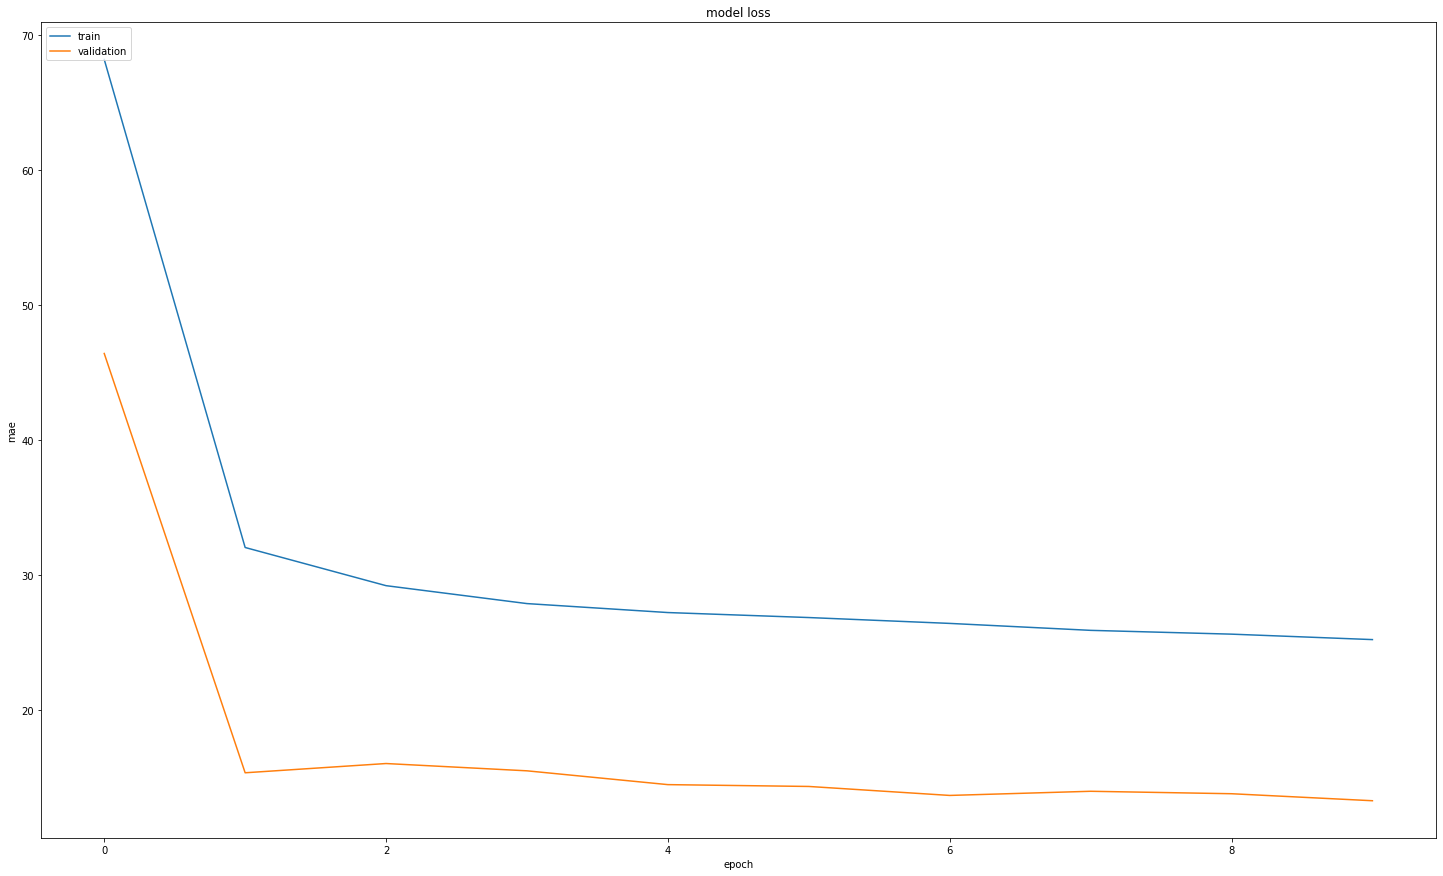

In [ ]:
print(history.history.keys())
# "Loss"
plt.figure(figsize=(25,15))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Pred

In [ ]:
df_test = pd.read_csv(path+'test.csv')
df_test = df_test.loc[:, 'volume [A^3]':'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']


In [ ]:
#functional
pre_t=[]
post_t=[]
for i in range (len(df_test)):
    x=df_test.functional_groups[i].split("-")
    if len(x)==1:
        pre_t.append(x[0])
        post_t.append("bank")
    else:
        pre_t.append(x[0])
        post_t.append(x[1])
df_test["Pre_function"]=pre_t
df_test["Post_function"]=post_t
df_test
        
len(df_test.Pre_function)

dummies_func_pre_t = pd.get_dummies(df_test['Pre_function'])
dummies_func_post_t = pd.get_dummies(df_test['Post_function'])
df_func_t=dummies_func_pre_t+dummies_func_post_t
df_func_t=df_func_t.drop(columns="bank")
df_func_t

,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
16996,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
16997,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#ONE_HOT
dummies_meatl = pd.get_dummies(df_test['metal_linker'], prefix='met')
dummies_topology = pd.get_dummies(df_test['topology'], prefix='topo')
df_onehot = pd.concat([dummies_meatl, dummies_topology], axis = 1)
#JOIN
df_onehot = pd.concat([df_onehot,df_func_t], axis = 1)
df_onehot

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
16996,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
16997,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
16998,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_test = df_test.drop(['functional_groups', 'metal_linker', 'organic_linker1', 'organic_linker2', 'topology',"Pre_function","Post_function"], axis=1)
df_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]
0,1208.301332,797.70936,586.54,0.11392,0.1039,36.639791,7.005640
1,4126.414623,3733.65779,852.49,0.21367,0.1422,18.390691,5.119399
2,1602.148373,747.21048,3155.73,0.33883,0.4375,13.062850,5.045400
3,2436.629312,995.80232,3521.09,0.40464,0.5963,9.601198,5.106238
4,3123.418006,1337.53800,2678.46,0.38959,0.5479,12.974954,5.287639
...,...,...,...,...,...,...,...
16995,32660.944605,4723.68288,5720.14,0.77614,3.2318,4.536626,3.146698
16996,5070.998617,1499.13262,4017.28,0.59192,1.2058,6.745508,3.658871
16997,4669.804446,1322.04892,4288.76,0.54950,1.1689,4.666206,3.593052
16998,4682.120862,1213.51148,4331.86,0.60643,1.4091,4.823305,3.454497


In [ ]:
df_test["Density"]=df_test["weight [u]"]/df_test["volume [A^3]"]
df_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,1208.301332,797.70936,586.54,0.11392,0.1039,36.639791,7.005640,0.660191
1,4126.414623,3733.65779,852.49,0.21367,0.1422,18.390691,5.119399,0.904819
2,1602.148373,747.21048,3155.73,0.33883,0.4375,13.062850,5.045400,0.466380
3,2436.629312,995.80232,3521.09,0.40464,0.5963,9.601198,5.106238,0.408680
4,3123.418006,1337.53800,2678.46,0.38959,0.5479,12.974954,5.287639,0.428229
...,...,...,...,...,...,...,...,...
16995,32660.944605,4723.68288,5720.14,0.77614,3.2318,4.536626,3.146698,0.144628
16996,5070.998617,1499.13262,4017.28,0.59192,1.2058,6.745508,3.658871,0.295629
16997,4669.804446,1322.04892,4288.76,0.54950,1.1689,4.666206,3.593052,0.283106
16998,4682.120862,1213.51148,4331.86,0.60643,1.4091,4.823305,3.454497,0.259180


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_stand = df_train_norm.copy()
X_test_stand = df_test.copy()
for i in X_train_stand.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    

normalized_df=X_test_stand
normalized_df

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,-0.497138,-0.671746,-1.282756,-1.337973,-0.705257,0.987679,1.251326,0.718466
1,0.055072,1.594456,-1.058897,-0.648720,-0.628784,-0.200220,-0.460612,2.182173
2,-0.422608,-0.710725,0.879816,0.216112,-0.039162,-0.547028,-0.527773,-0.441179
3,-0.264695,-0.518842,1.187351,0.670846,0.277913,-0.772359,-0.472557,-0.786422
4,-0.134730,-0.255063,0.478082,0.566853,0.181273,-0.552749,-0.307919,-0.669454
...,...,...,...,...,...,...,...,...
16995,5.454812,2.358637,3.038364,3.237839,5.540189,-1.102030,-2.251021,-2.366352
16996,0.233820,-0.130331,1.605010,1.964915,1.494895,-0.958246,-1.786176,-1.462854
16997,0.157900,-0.267019,1.833524,1.671801,1.421217,-1.093595,-1.845913,-1.537783
16998,0.160231,-0.350796,1.869803,2.065176,1.900822,-1.083369,-1.971665,-1.680942


In [ ]:
df_test = pd.concat([df_onehot,normalized_df], axis=1)
#df_test = pd.concat([df_onehot,df_test], axis=1)
df_test

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],Density
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.497138,-0.671746,-1.282756,-1.337973,-0.705257,0.987679,1.251326,0.718466
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.055072,1.594456,-1.058897,-0.648720,-0.628784,-0.200220,-0.460612,2.182173
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.422608,-0.710725,0.879816,0.216112,-0.039162,-0.547028,-0.527773,-0.441179
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.264695,-0.518842,1.187351,0.670846,0.277913,-0.772359,-0.472557,-0.786422
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-0.134730,-0.255063,0.478082,0.566853,0.181273,-0.552749,-0.307919,-0.669454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5.454812,2.358637,3.038364,3.237839,5.540189,-1.102030,-2.251021,-2.366352
16996,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.233820,-0.130331,1.605010,1.964915,1.494895,-0.958246,-1.786176,-1.462854
16997,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.157900,-0.267019,1.833524,1.671801,1.421217,-1.093595,-1.845913,-1.537783
16998,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.160231,-0.350796,1.869803,2.065176,1.900822,-1.083369,-1.971665,-1.680942


In [ ]:
column_rename={'volume [A^3]':"VOLUMNS", 'weight [u]':"WEIGHT", 'surface_area [m^2/g]':"SURFACE",
       'void_volume [cm^3/g]':"Void_volumns", 'CO2/N2_selectivity':"CO2_sel",
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]':"Heat_absob"}

df_test=df_test.rename(columns=column_rename)


#df_test=df_test.drop(columns=["VOLUMNS","WEIGHT"])
#df_test=df_test.drop(columns=["WEIGHT"])
df_test

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H,VOLUMNS,WEIGHT,SURFACE,void_fraction,Void_volumns,CO2_sel,Heat_absob,Density
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.497138,-0.671746,-1.282756,-1.337973,-0.705257,0.987679,1.251326,0.718466
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.055072,1.594456,-1.058897,-0.648720,-0.628784,-0.200220,-0.460612,2.182173
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.422608,-0.710725,0.879816,0.216112,-0.039162,-0.547028,-0.527773,-0.441179
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.264695,-0.518842,1.187351,0.670846,0.277913,-0.772359,-0.472557,-0.786422
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-0.134730,-0.255063,0.478082,0.566853,0.181273,-0.552749,-0.307919,-0.669454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5.454812,2.358637,3.038364,3.237839,5.540189,-1.102030,-2.251021,-2.366352
16996,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.233820,-0.130331,1.605010,1.964915,1.494895,-0.958246,-1.786176,-1.462854
16997,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.157900,-0.267019,1.833524,1.671801,1.421217,-1.093595,-1.845913,-1.537783
16998,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.160231,-0.350796,1.869803,2.065176,1.900822,-1.083369,-1.971665,-1.680942


In [ ]:
X

,met_1,met_2,met_3,met_4,met_9,met_10,met_12,topo_acs,topo_bcu,topo_etb,topo_fof,topo_nbo,topo_pcu,topo_pts,topo_rht,topo_sra,topo_tbo,topo_the,Br,CN,COOH,Cl,Et,F,H,HCO,I,Me,NH2,NHMe,NO2,OEt,OH,OMe,OPr,Ph,Pr,SO3H,VOLUMNS,WEIGHT,SURFACE,void_fraction,Void_volumns,CO2_sel,Heat_absob,Density
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.201704,0.419684,-1.268388,-1.171999,-0.705058,0.790900,1.379883,1.546561
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.519559,-0.690288,-1.112760,-1.097373,-0.660731,-0.143391,0.654427,1.016037
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.308490,-0.280457,-0.563083,-0.617833,-0.469448,0.275659,0.511135,0.308178
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.022570,-0.096449,0.269408,0.437986,0.230391,-0.281206,-0.207480,-0.897118
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-0.050994,0.221351,-0.488598,0.178384,-0.181526,-0.201971,0.614393,0.048238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53773,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,-0.455851,-0.305302,-0.645497,-0.039067,-0.505788,-1.015388,-1.035951,2.105605
53774,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3.805202,2.956126,1.743863,2.458827,2.561327,-1.133005,-1.834445,-1.857861
53775,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.997299,2.105832,1.716422,1.816976,1.332764,-1.116560,-2.056310,-1.403779
53776,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.490794,1.748096,1.865392,2.501876,2.567517,-1.172929,-2.582412,-1.847367


In [ ]:
X.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
pred = model.predict(df_test)
pred

array([[222.34938   ],
       [ 57.79447   ],
       [ 77.609535  ],
       ...,
       [ -0.59580183],
       [ -2.2555344 ],
       [ -3.063987  ]], dtype=float32)

In [ ]:
pred=pred.flatten()
pred.shape

(17000,)

#EXPORT

In [ ]:
ID = np.arange(68614, 85614)

In [ ]:
pd.DataFrame({'id':ID, 'CO2_working_capacity [mL/g]': pred}).set_index('id').to_csv('wonderland_final_NN_10per.csv')